Text(0.5,1,'Cantidad de ocurrencias de cada marca')

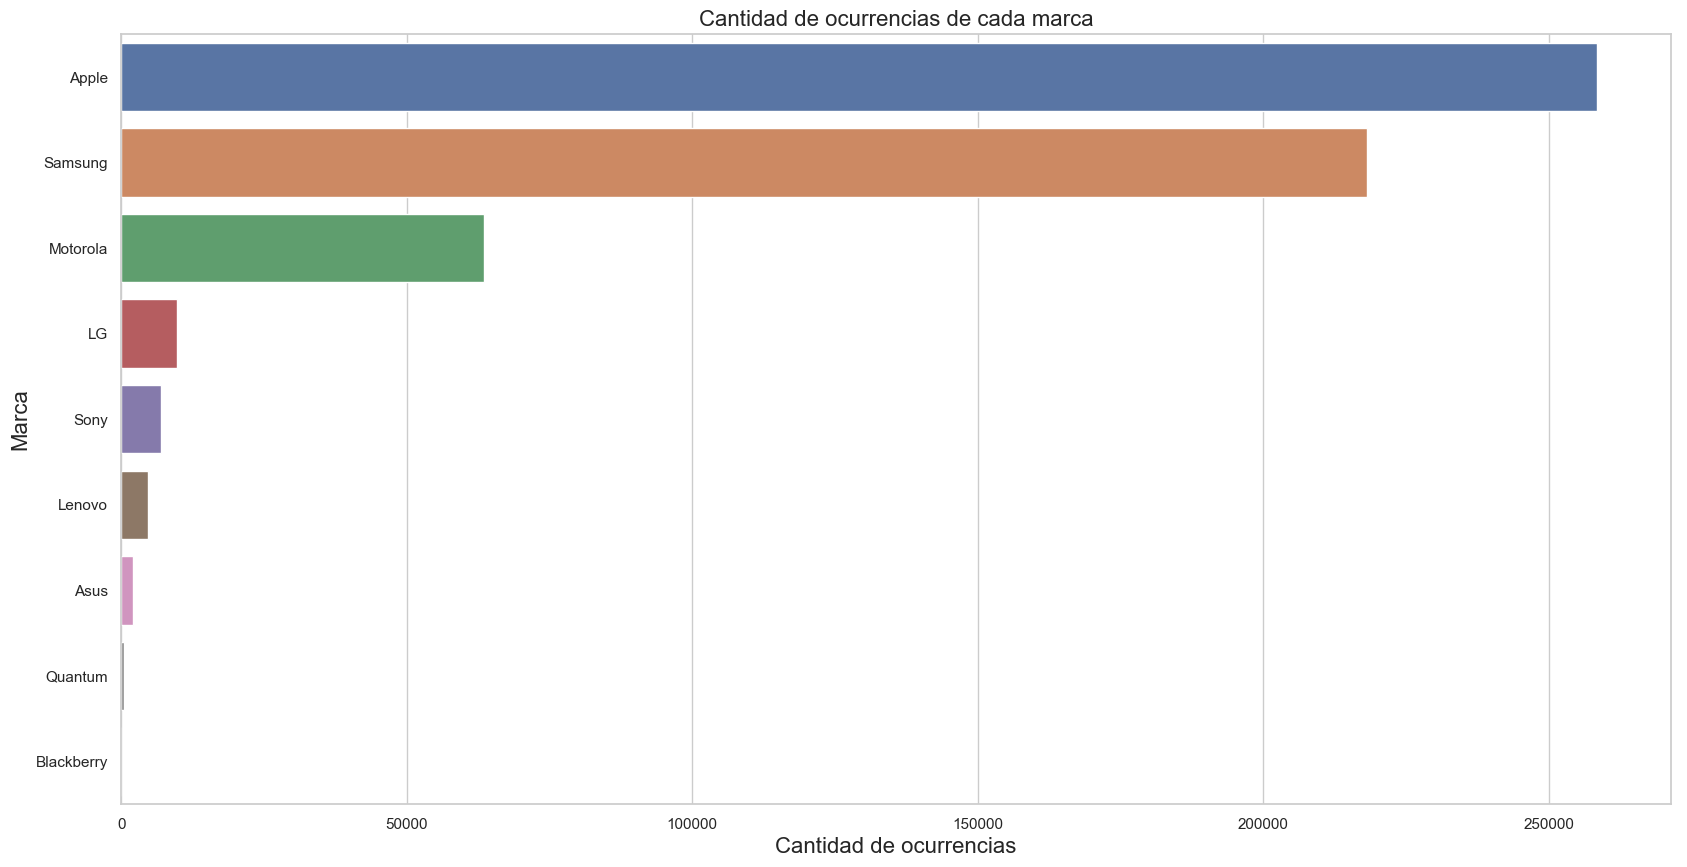

In [97]:
import pandas as pd
import math

import matplotlib as mp
%matplotlib inline
mp.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
mp.rcParams['figure.figsize'] = (20, 10)

import seaborn as sns
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv("events.csv", low_memory = False)

def getBrand(s):
    if (type(s) == float): return None
    
    parsedBrand = s.split()[0]
    return "Apple" if parsedBrand in {"iPad", "iPhone"} else parsedBrand #Agrupamos iPad e iPhone en Apple

df['marca'] = df['model'].apply(lambda x: getBrand(x))
brand_counts = df['marca'].value_counts()

g = sns.barplot(x=brand_counts.values, y=brand_counts.index, orient='h')
g.set_xlabel("Cantidad de ocurrencias", fontsize=16)
g.set_ylabel("Marca", fontsize=16)
g.set_title("Cantidad de ocurrencias de cada marca", fontsize=16)

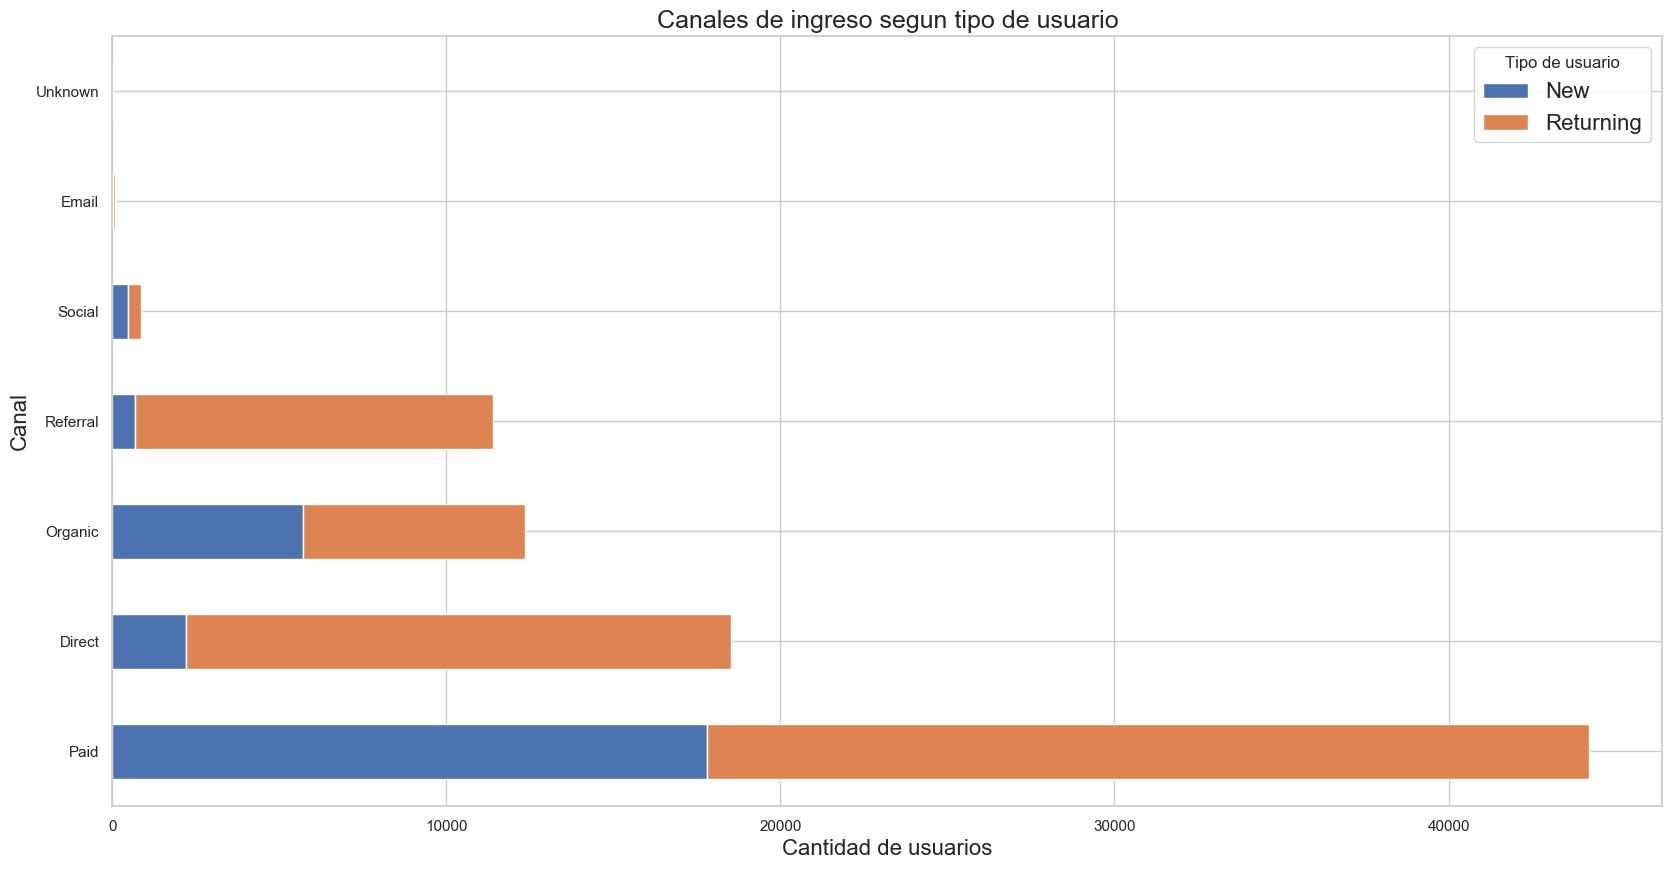

In [92]:
users_by_channel = df.groupby(['channel', 'new_vs_returning'])['channel'].agg('count').unstack()
users_by_channel["total"] = users_by_channel["New"] + users_by_channel["Returning"] 

sorted_dataframe = users_by_channel.sort_values(ascending=False, by='total')
sorted_dataframe.drop(['total'], inplace=True, axis=1)

g = sorted_dataframe.plot(kind='barh', stacked=True)

g.set_title('Canales de ingreso segun tipo de usuario', fontsize=18)
g.set_xlabel('Cantidad de usuarios', fontsize=16)
g.set_ylabel('Canal',fontsize=16)
g.legend(title='Tipo de usuario', fontsize=16)

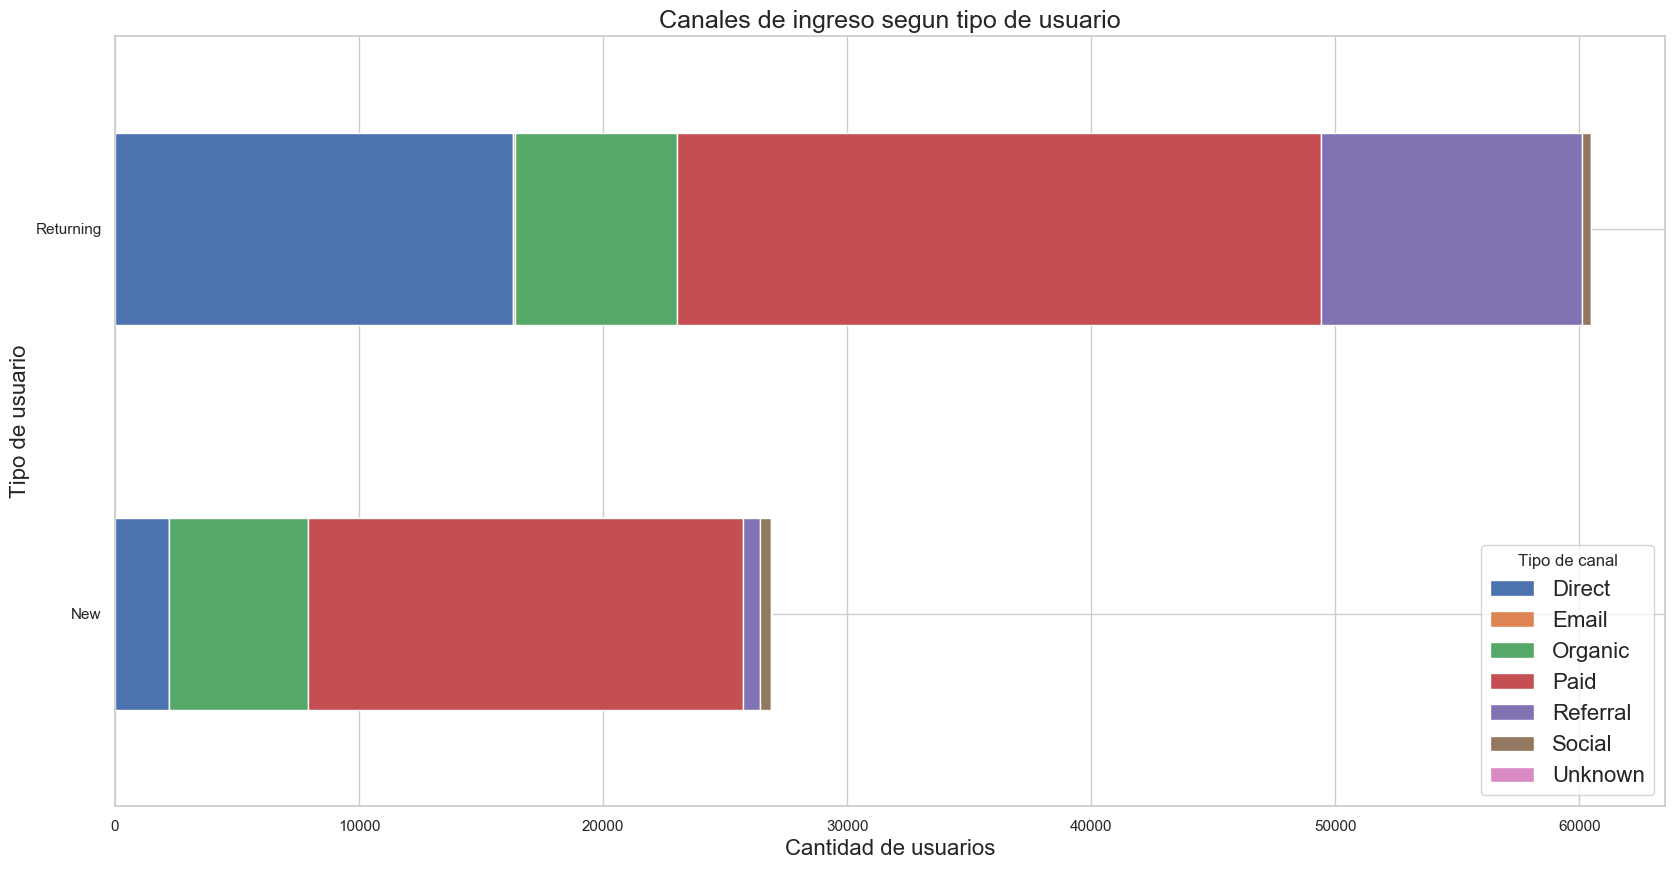

In [93]:
invertido = df.groupby(['new_vs_returning', 'channel'])['new_vs_returning'].agg('count').unstack()
invertido.sort_values(ascending=False, by='new_vs_returning')

g2 = invertido.plot(kind='barh', stacked=True)

g2.set_title('Canales de ingreso segun tipo de usuario', fontsize=18)
g2.set_xlabel('Cantidad de usuarios', fontsize=16)
g2.set_ylabel('Tipo de usuario',fontsize=16)
g2.legend(title='Tipo de canal', fontsize=16)

Text(0.5,1,'Ventas por condicion del producto')

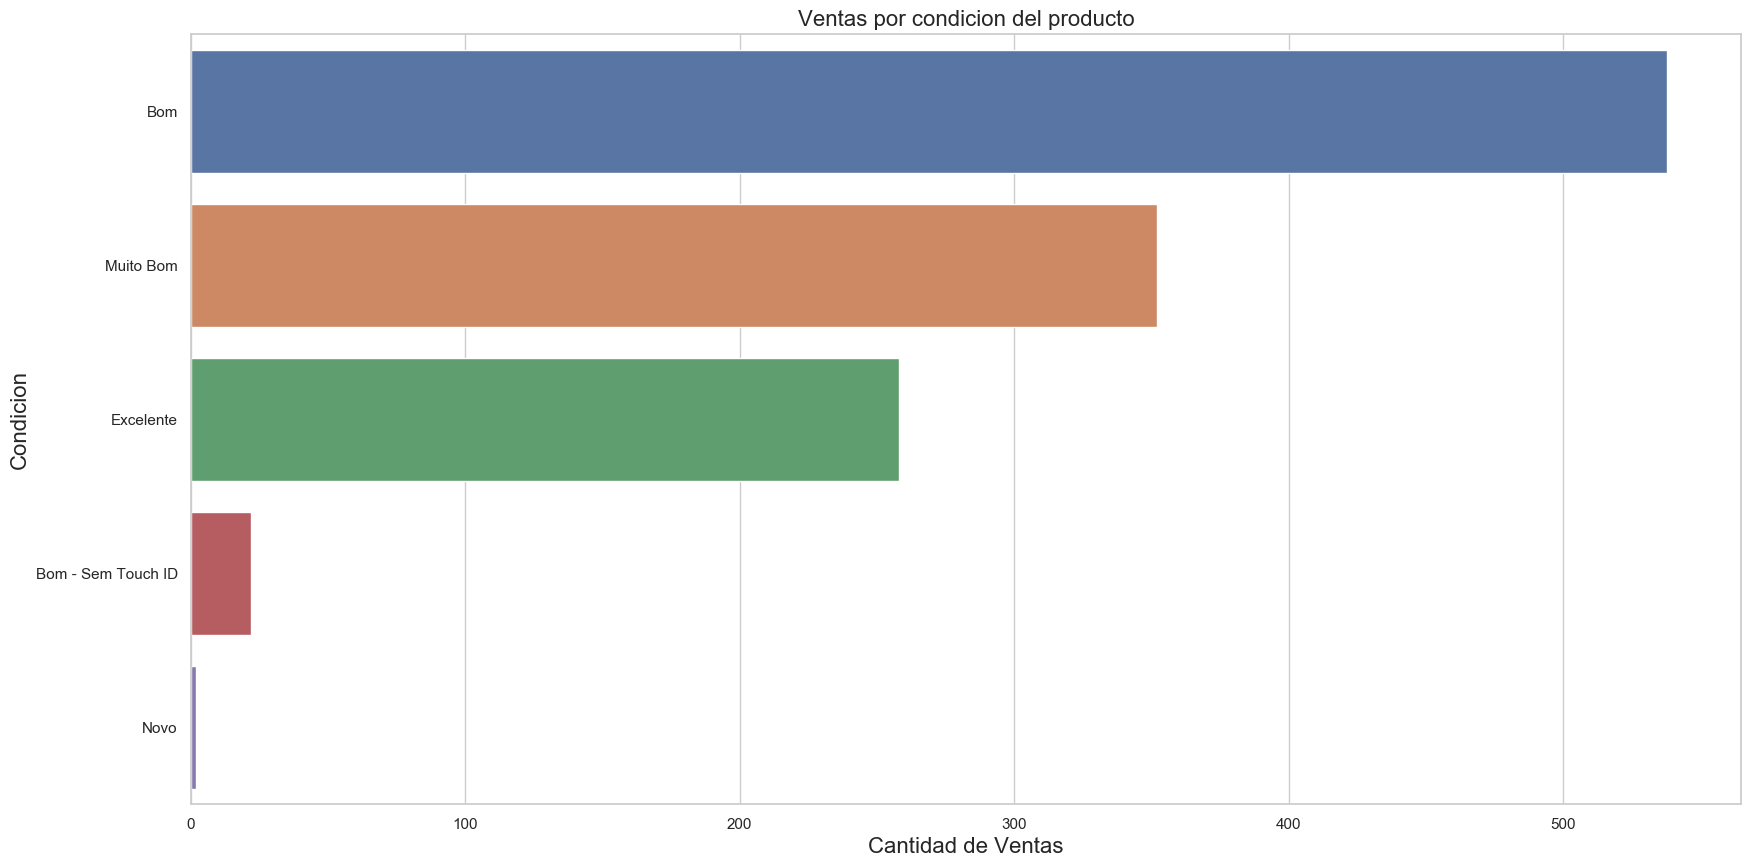

In [94]:
df = df.loc[df['event'] == "conversion"]
events_counts = df['condition'].value_counts()

g = sns.barplot(x=events_counts.values, y=events_counts.index, orient='h')
g.set_xlabel("Cantidad de Ventas", fontsize=16)
g.set_ylabel("Condicion", fontsize=16)
g.set_title("Ventas por condicion del producto", fontsize=16)